In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_path = r'F:\DataSpell\data_science_ml_learning\DATA\Advertising.csv'

In [3]:
df = pd.read_csv(df_path)

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
X = df.drop('sales', axis=1)

In [7]:
y = df['sales']

In [8]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [9]:
poly_features = polynomial_converter.fit_transform(X)

In [10]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [11]:
X.shape

(200, 3)

In [13]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [15]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [18]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [19]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('sales', axis=1)
y = df['sales']

In [23]:
poly_features = polynomial_converter.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, train_size=0.3, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression(fit_intercept=True)

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
test_predictions = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [33]:
print(f'MAE: {MAE}', f'MSE: {MSE}', f'RMSE: {RMSE}', sep='\n')

MAE: 0.4623270005580218
MSE: 0.49629703358833593
RMSE: 0.7044835225811431


In [39]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression(n_jobs=-1, fit_intercept=True)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
pd.DataFrame(train_rmse_errors, columns=['RMSE Train']).join(pd.DataFrame(test_rmse_errors, columns=['RMSE Test']))

,RMSE Train,RMSE Test
0,1.734594,1.516152
1,0.587957,0.664643
2,0.433934,0.580329
3,0.351708,0.507774
4,0.250934,2.575808
5,0.199456,4.263812
6,5.418481,1383.405262
7,0.150862,3733.422575
8,0.171752,95489.264527


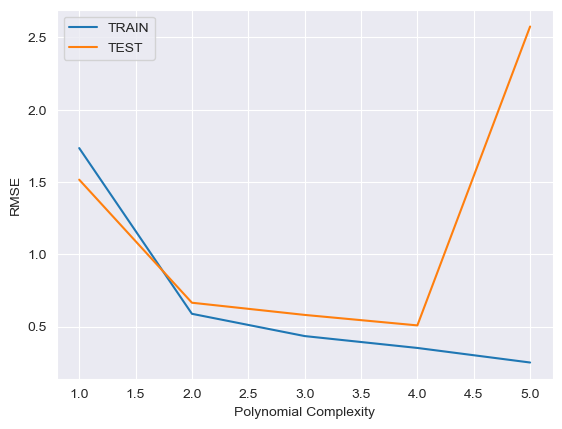

In [40]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='TRAIN')
plt.plot(range(1, 6), test_rmse_errors[:5], label='TEST')
plt.xlabel('Polynomial Complexity')
plt.ylabel('RMSE')
plt.legend()

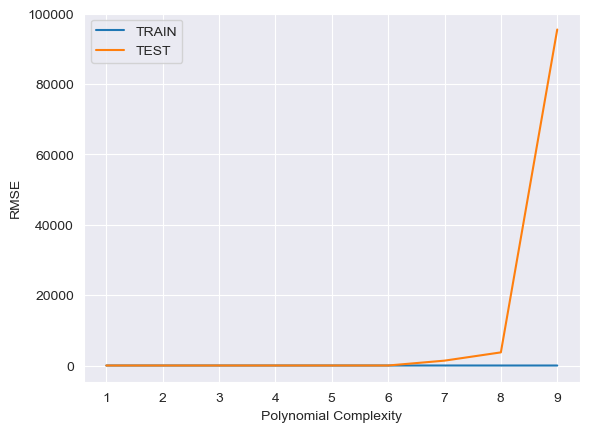

In [41]:
plt.plot(range(1, 10), train_rmse_errors, label='TRAIN')
plt.plot(range(1, 10), test_rmse_errors, label='TEST')
plt.xlabel('Polynomial Complexity')
plt.ylabel('RMSE')
plt.legend()

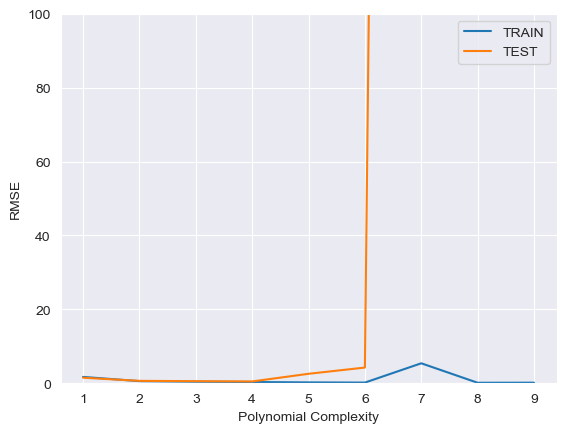

In [43]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

In [48]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [49]:
final_model = LinearRegression(n_jobs=-1)

In [50]:
final_model.fit(final_poly_converter.fit_transform(X), y)

LinearRegression(n_jobs=-1)

In [51]:
from joblib import dump, load

In [52]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [53]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [54]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [55]:
campaign = [[149, 22, 12]]

In [56]:
campaign_poly = loaded_poly.transform(campaign)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [57]:
loaded_model.predict(campaign_poly)

array([14.64501014])